In [1]:
def x_reduce(x,bs):
    factor = 100
    #print(x.shape)
    x = x.reshape(int(x.shape[0]/factor),100,x.shape[1],x.shape[2])
    x = x[:,:bs,:,:]
    #print(x.shape)
    x = x.reshape(x.shape[0]*x.shape[1],x.shape[2],x.shape[3])
    #print(x.shape)
    return x

In [60]:
x = torch.load("dataset_creating/storing_sem/dataHier_n_%d_m_%d_nc_%d_L_%d_s0_%d_s_%d_idx_0.pt"%(4, 4, 4,2, 2,2))
print(x.size())

torch.Size([1200, 4, 36])


In [61]:
bs = 100
x = x_reduce(x,bs)
x1 = x[:bs,:,:]
x_diff = x[bs:2*bs,:,:]

magnitude = (x1-x_diff).pow(2).mean(dim=(1,2)).pow(.5).mean(0)

In [62]:
print(magnitude)

tensor(0.3667)


In [ ]:

x_tot = torch.tensor([[0,1,0,1],])
x = x_tot[:,:,0]
x_diff = x_tot[:,:,1]
magnitude = (x-x_diff).pow(2).sum(dim=1).pow(.5).mean(0)

In [2]:
import torch
from torch.utils.data import Dataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools 
import random
import numpy as np
import matplotlib.lines as mlines
import pickle
import io
from stabs import*



class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)
def load_file(f):
    with open(f, "rb") as rb:
        pickle.load(rb)
        #return pickle.load(rb)
        return CPU_Unpickler(rb).load()
def remove_module_state(state):
    # original saved file with DataParallel
    # create new OrderedDict that does not contain `module.`
    from collections import OrderedDict
    new_state = OrderedDict()
    for k, v in state.items():
        #print(k)
        name = k[7:] # remove `module.`
        new_state[name] = v
        #print(name)
    return new_state




8


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


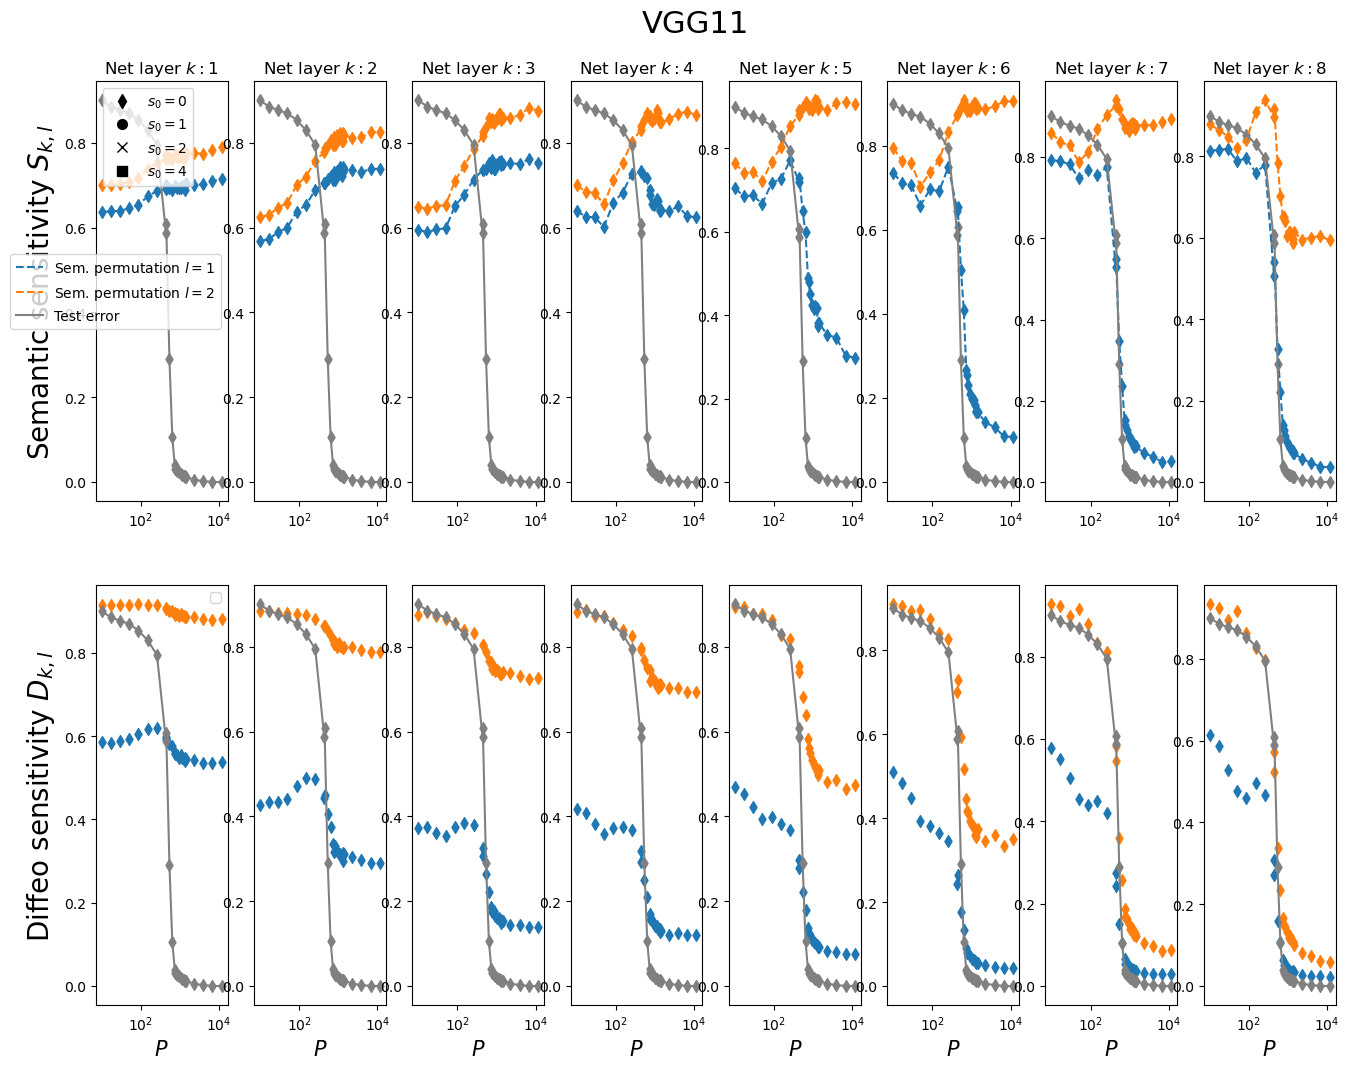

In [3]:
n=10

L=2
s=2

bs = 20
s0s = [2]#,2,4,6
net ='VGG11'

colors = ['C'+str(gg) for gg in range(0,L)]#cm.rainbow(np.linspace(0, 1, L))


m = n**(s-1)
for idx_s0 in range(len(s0s)):
    s0 = s0s[idx_s0]
    
    mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    num_layers = mat_all_pos.size(dim=1)
    print(num_layers)
    
    fig, axs = plt.subplots(2,num_layers, figsize = (16,12))
    fig.suptitle(net,fontsize =22,y=.94)
    
    #if s0>0 and L==2 and s==2:
    #    xx =xx
    #else:
    #    xx = xx*n
                            
    #xx = xx/(s0+1)**2 
    
    if idx_s0==0:
        mar = "d"
    elif idx_s0==1:
        mar = "o"
    elif idx_s0==2:
        mar = "x"
    elif idx_s0==3:
        mar = "s"
    for k in range(num_layers):
        
        for l in range(L):
            #print(mat_all[:,k,l])
            #print(s0s[idx_s0])
            #print(xx)
            #print(mat_all_sem[idx_s0,:len(xx),k,l])
            if idx_s0==0:
                axs[0,k].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],label =r"Sem. permutation $l=%d$" %(l+1),ls='--') 
                #axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
            else: 
                axs[0,k].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],ls='--') 
                if idx_s0==1:
                    axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
                else:
                    axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],ls='--') 
            if s0==0:
                axs[0,k].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            else:
                axs[0,k].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
                axs[1,k].scatter(xx, mat_all_pos[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            #axs[k].plot(xx, mat_norms[:,k,l], color = 'black',label ="norm l=%d" %(l+1)) 
        if k==0 and idx_s0==0:
            axs[0,k].plot(xx, mat_terr[:len(xx)], color = 'grey',label ="Test error" ) 
            axs[1,k].plot(xx, mat_terr[:len(xx)], color = 'grey')
        else:
            axs[0,k].plot(xx, mat_terr[:len(xx)], color = 'grey') 
            axs[1,k].plot(xx, mat_terr[:len(xx)], color = 'grey') 
        axs[0,k].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        axs[1,k].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        
        axs[0,k].set_xscale("log")
        axs[1,k].set_xscale("log")
        axs[1,k].set_xlabel("$P$",size = 15)
        #axs[k].set_ylim(0,1)
        if k==0: 
            axs[0,0].set_ylabel(r"Semantic sensitivity $S_{k,l}$",size = 20)
            axs[0,0].legend()
            axs[1,0].set_ylabel(r"Diffeo sensitivity $D_{k,l}$",size = 20)
            axs[1,0].legend()
        if k<num_layers:
            axs[0,k].set_title(r"Net layer $k: %d$" %(k+1))
        else:
            axs[0,L].set_title("Output")
            
s01 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s02 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s03 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s04 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
first_legend = axs[0,0].legend()
ax = axs[0,0].add_artist(first_legend)
axs[0,0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')  


#plt.savefig("figures/sens_cnn_L_%d_s_%d.png" %(L,s), bbox_inches='tight')
#plt.savefig("figures/sens_cnn_L_%d_s_%d.pdf" %(L,s), bbox_inches='tight')

13


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


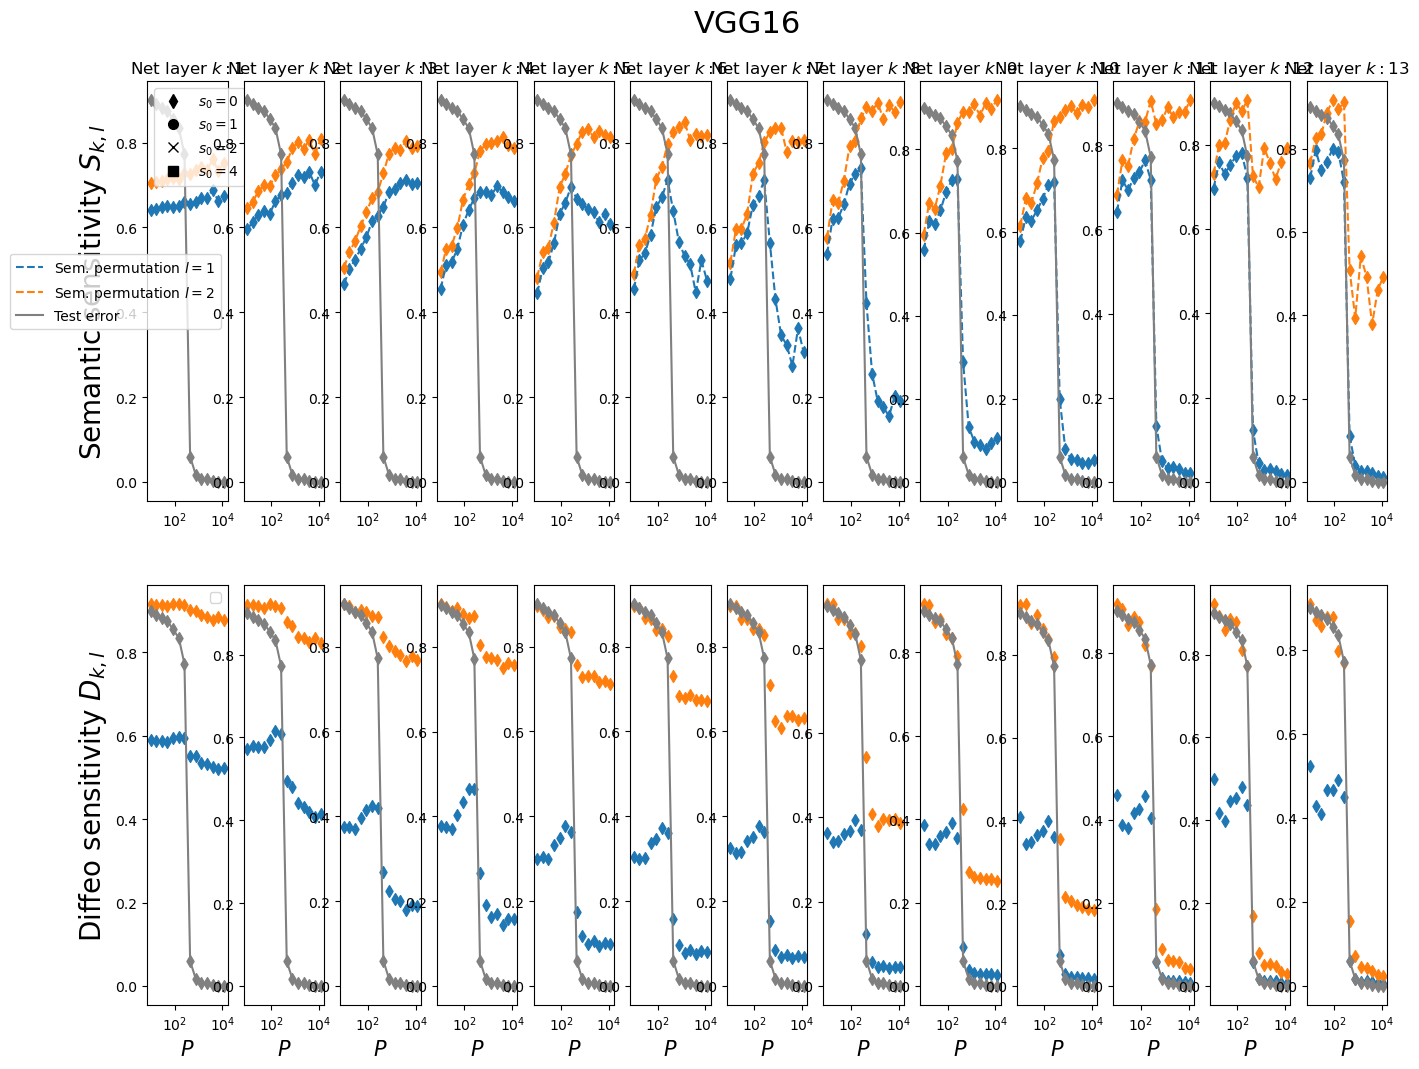

In [8]:
n=10

L=2
s=2

bs = 20
s0s = [2]#,2,4,6
net ='VGG16'

colors = ['C'+str(gg) for gg in range(0,L)]#cm.rainbow(np.linspace(0, 1, L))


m = n**(s-1)
for idx_s0 in range(len(s0s)):
    s0 = s0s[idx_s0]
    
    mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    num_layers = mat_all_pos.size(dim=1)
    print(num_layers)
    
    fig, axs = plt.subplots(2,num_layers, figsize = (16,12))
    fig.suptitle(net,fontsize =22,y=.94)
    
    #if s0>0 and L==2 and s==2:
    #    xx =xx
    #else:
    #    xx = xx*n
                            
    #xx = xx/(s0+1)**2 
    
    if idx_s0==0:
        mar = "d"
    elif idx_s0==1:
        mar = "o"
    elif idx_s0==2:
        mar = "x"
    elif idx_s0==3:
        mar = "s"
    for k in range(num_layers):
        
        for l in range(L):
            #print(mat_all[:,k,l])
            #print(s0s[idx_s0])
            #print(xx)
            #print(mat_all_sem[idx_s0,:len(xx),k,l])
            if idx_s0==0:
                axs[0,k].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],label =r"Sem. permutation $l=%d$" %(l+1),ls='--') 
                #axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
            else: 
                axs[0,k].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],ls='--') 
                if idx_s0==1:
                    axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
                else:
                    axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],ls='--') 
            if s0==0:
                axs[0,k].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            else:
                axs[0,k].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
                axs[1,k].scatter(xx, mat_all_pos[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            #axs[k].plot(xx, mat_norms[:,k,l], color = 'black',label ="norm l=%d" %(l+1)) 
        if k==0 and idx_s0==0:
            axs[0,k].plot(xx, mat_terr[:len(xx)], color = 'grey',label ="Test error" ) 
            axs[1,k].plot(xx, mat_terr[:len(xx)], color = 'grey')
        else:
            axs[0,k].plot(xx, mat_terr[:len(xx)], color = 'grey') 
            axs[1,k].plot(xx, mat_terr[:len(xx)], color = 'grey') 
        axs[0,k].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        axs[1,k].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        
        axs[0,k].set_xscale("log")
        axs[1,k].set_xscale("log")
        axs[1,k].set_xlabel("$P$",size = 15)
        #axs[k].set_ylim(0,1)
        if k==0: 
            axs[0,0].set_ylabel(r"Semantic sensitivity $S_{k,l}$",size = 20)
            axs[0,0].legend()
            axs[1,0].set_ylabel(r"Diffeo sensitivity $D_{k,l}$",size = 20)
            axs[1,0].legend()
        if k<num_layers:
            axs[0,k].set_title(r"Net layer $k: %d$" %(k+1))
        else:
            axs[0,L].set_title("Output")
            
s01 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s02 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s03 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s04 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
first_legend = axs[0,0].legend()
ax = axs[0,0].add_artist(first_legend)
axs[0,0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')  


#plt.savefig("figures/sens_cnn_L_%d_s_%d.png" %(L,s), bbox_inches='tight')
#plt.savefig("figures/sens_cnn_L_%d_s_%d.pdf" %(L,s), bbox_inches='tight')

17


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


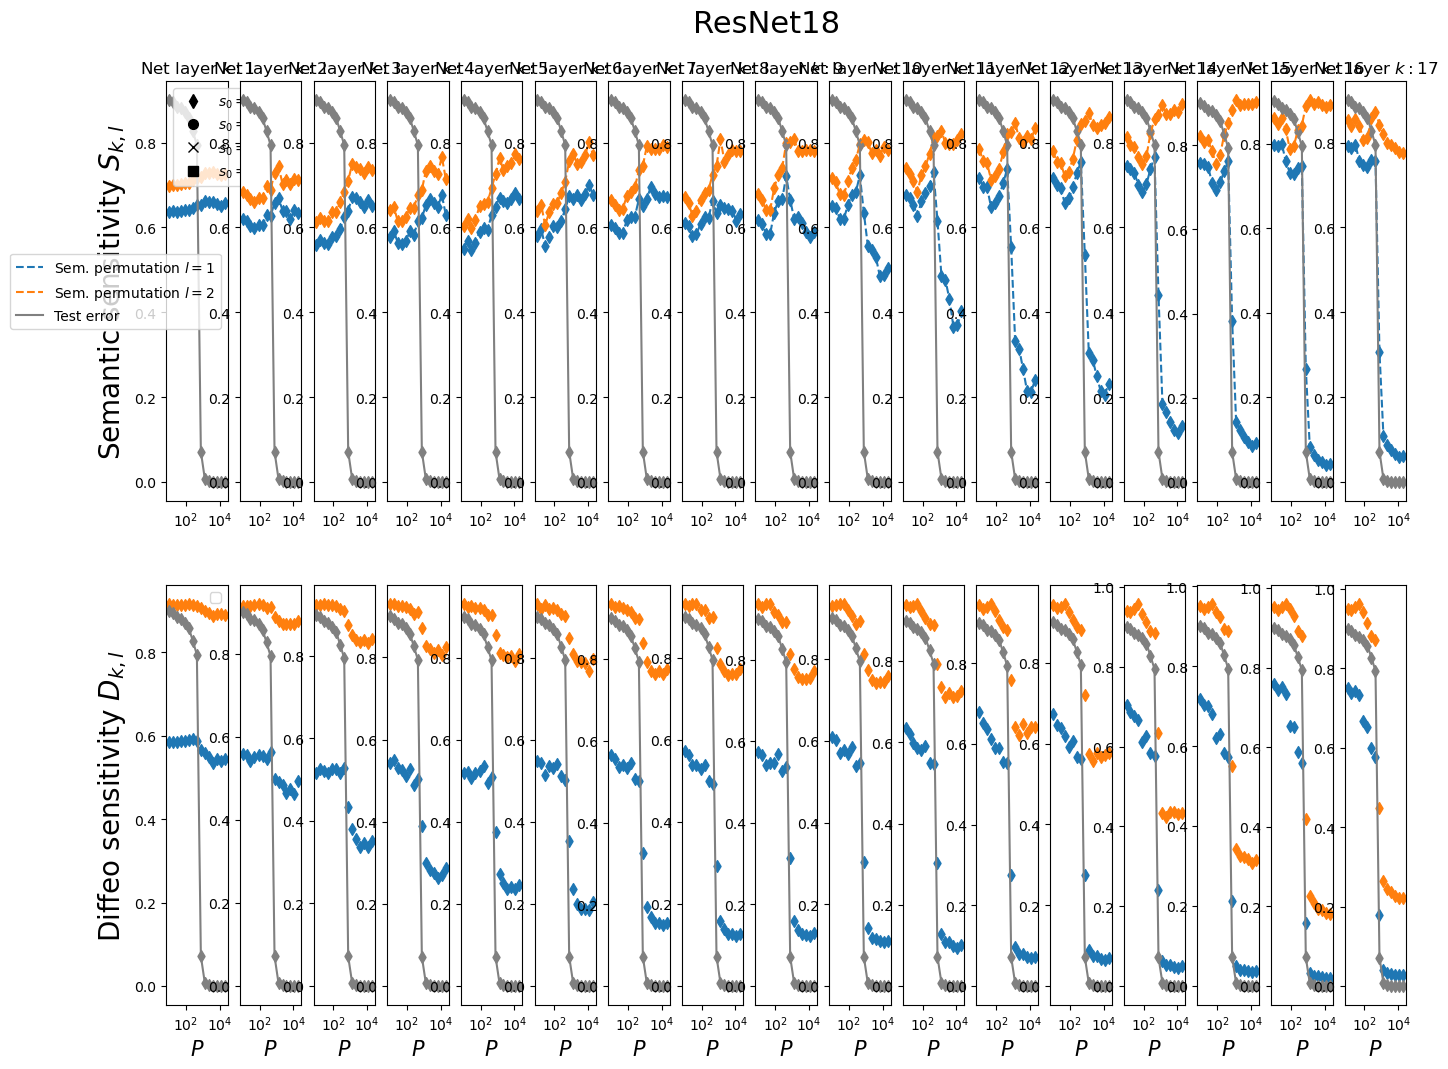

In [9]:
n=10

L=2
s=2

bs = 20
s0s = [2]#,2,4,6
net ='ResNet18'

colors = ['C'+str(gg) for gg in range(0,L)]#cm.rainbow(np.linspace(0, 1, L))


m = n**(s-1)
for idx_s0 in range(len(s0s)):
    s0 = s0s[idx_s0]
    
    mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    num_layers = mat_all_pos.size(dim=1)
    print(num_layers)
    
    fig, axs = plt.subplots(2,num_layers, figsize = (16,12))
    fig.suptitle(net,fontsize =22,y=.94)
    
    #if s0>0 and L==2 and s==2:
    #    xx =xx
    #else:
    #    xx = xx*n
                            
    #xx = xx/(s0+1)**2 
    
    if idx_s0==0:
        mar = "d"
    elif idx_s0==1:
        mar = "o"
    elif idx_s0==2:
        mar = "x"
    elif idx_s0==3:
        mar = "s"
    for k in range(num_layers):
        
        for l in range(L):
            #print(mat_all[:,k,l])
            #print(s0s[idx_s0])
            #print(xx)
            #print(mat_all_sem[idx_s0,:len(xx),k,l])
            if idx_s0==0:
                axs[0,k].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],label =r"Sem. permutation $l=%d$" %(l+1),ls='--') 
                #axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
            else: 
                axs[0,k].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],ls='--') 
                if idx_s0==1:
                    axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
                else:
                    axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],ls='--') 
            if s0==0:
                axs[0,k].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            else:
                axs[0,k].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
                axs[1,k].scatter(xx, mat_all_pos[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            #axs[k].plot(xx, mat_norms[:,k,l], color = 'black',label ="norm l=%d" %(l+1)) 
        if k==0 and idx_s0==0:
            axs[0,k].plot(xx, mat_terr[:len(xx)], color = 'grey',label ="Test error" ) 
            axs[1,k].plot(xx, mat_terr[:len(xx)], color = 'grey')
        else:
            axs[0,k].plot(xx, mat_terr[:len(xx)], color = 'grey') 
            axs[1,k].plot(xx, mat_terr[:len(xx)], color = 'grey') 
        axs[0,k].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        axs[1,k].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        
        axs[0,k].set_xscale("log")
        axs[1,k].set_xscale("log")
        axs[1,k].set_xlabel("$P$",size = 15)
        #axs[k].set_ylim(0,1)
        if k==0: 
            axs[0,0].set_ylabel(r"Semantic sensitivity $S_{k,l}$",size = 20)
            axs[0,0].legend()
            axs[1,0].set_ylabel(r"Diffeo sensitivity $D_{k,l}$",size = 20)
            axs[1,0].legend()
        if k<num_layers:
            axs[0,k].set_title(r"Net layer $k: %d$" %(k+1))
        else:
            axs[0,L].set_title("Output")
            
s01 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s02 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s03 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s04 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
first_legend = axs[0,0].legend()
ax = axs[0,0].add_artist(first_legend)
axs[0,0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')  


#plt.savefig("figures/sens_cnn_L_%d_s_%d.png" %(L,s), bbox_inches='tight')
#plt.savefig("figures/sens_cnn_L_%d_s_%d.pdf" %(L,s), bbox_inches='tight')

33


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


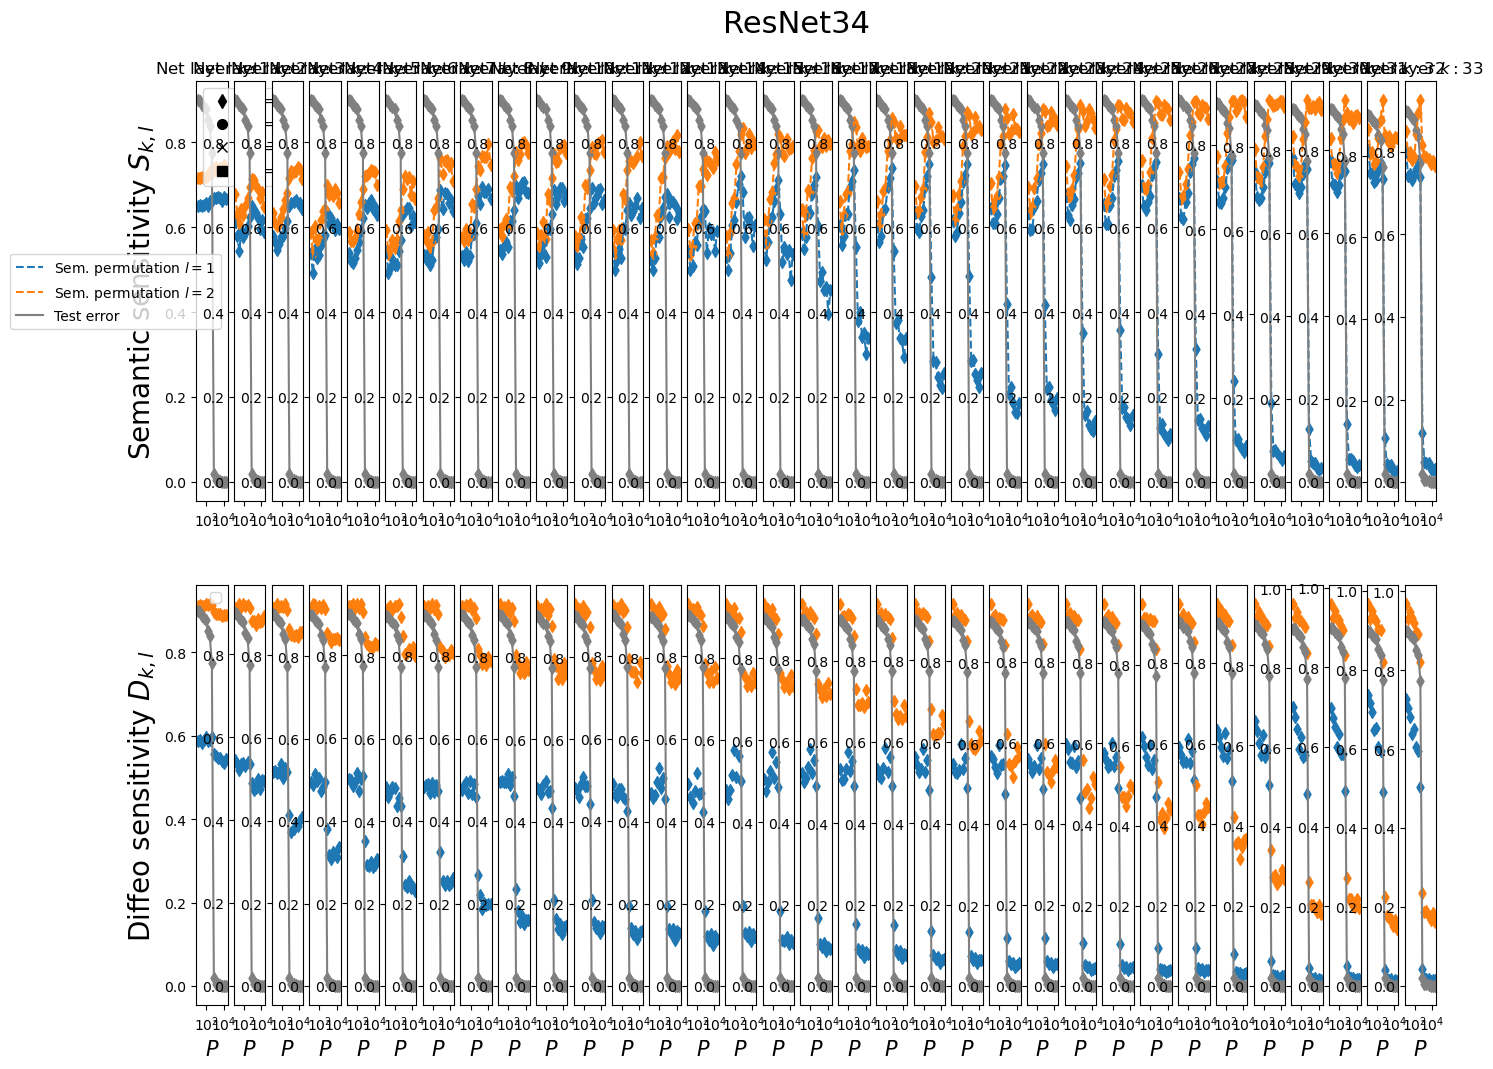

In [10]:
n=10

L=2
s=2

bs = 20
s0s = [2]#,2,4,6
net ='ResNet34'

colors = ['C'+str(gg) for gg in range(0,L)]#cm.rainbow(np.linspace(0, 1, L))


m = n**(s-1)
for idx_s0 in range(len(s0s)):
    s0 = s0s[idx_s0]
    
    mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    num_layers = mat_all_pos.size(dim=1)
    print(num_layers)
    
    fig, axs = plt.subplots(2,num_layers, figsize = (16,12))
    fig.suptitle(net,fontsize =22,y=.94)
    
    #if s0>0 and L==2 and s==2:
    #    xx =xx
    #else:
    #    xx = xx*n
                            
    #xx = xx/(s0+1)**2 
    
    if idx_s0==0:
        mar = "d"
    elif idx_s0==1:
        mar = "o"
    elif idx_s0==2:
        mar = "x"
    elif idx_s0==3:
        mar = "s"
    for k in range(num_layers):
        
        for l in range(L):
            #print(mat_all[:,k,l])
            #print(s0s[idx_s0])
            #print(xx)
            #print(mat_all_sem[idx_s0,:len(xx),k,l])
            if idx_s0==0:
                axs[0,k].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],label =r"Sem. permutation $l=%d$" %(l+1),ls='--') 
                #axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
            else: 
                axs[0,k].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],ls='--') 
                if idx_s0==1:
                    axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
                else:
                    axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],ls='--') 
            if s0==0:
                axs[0,k].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            else:
                axs[0,k].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
                axs[1,k].scatter(xx, mat_all_pos[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            #axs[k].plot(xx, mat_norms[:,k,l], color = 'black',label ="norm l=%d" %(l+1)) 
        if k==0 and idx_s0==0:
            axs[0,k].plot(xx, mat_terr[:len(xx)], color = 'grey',label ="Test error" ) 
            axs[1,k].plot(xx, mat_terr[:len(xx)], color = 'grey')
        else:
            axs[0,k].plot(xx, mat_terr[:len(xx)], color = 'grey') 
            axs[1,k].plot(xx, mat_terr[:len(xx)], color = 'grey') 
        axs[0,k].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        axs[1,k].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        
        axs[0,k].set_xscale("log")
        axs[1,k].set_xscale("log")
        axs[1,k].set_xlabel("$P$",size = 15)
        #axs[k].set_ylim(0,1)
        if k==0: 
            axs[0,0].set_ylabel(r"Semantic sensitivity $S_{k,l}$",size = 20)
            axs[0,0].legend()
            axs[1,0].set_ylabel(r"Diffeo sensitivity $D_{k,l}$",size = 20)
            axs[1,0].legend()
        if k<num_layers:
            axs[0,k].set_title(r"Net layer $k: %d$" %(k+1))
        else:
            axs[0,L].set_title("Output")
            
s01 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s02 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s03 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s04 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
first_legend = axs[0,0].legend()
ax = axs[0,0].add_artist(first_legend)
axs[0,0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')  


#plt.savefig("figures/sens_cnn_L_%d_s_%d.png" %(L,s), bbox_inches='tight')
#plt.savefig("figures/sens_cnn_L_%d_s_%d.pdf" %(L,s), bbox_inches='tight')

64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


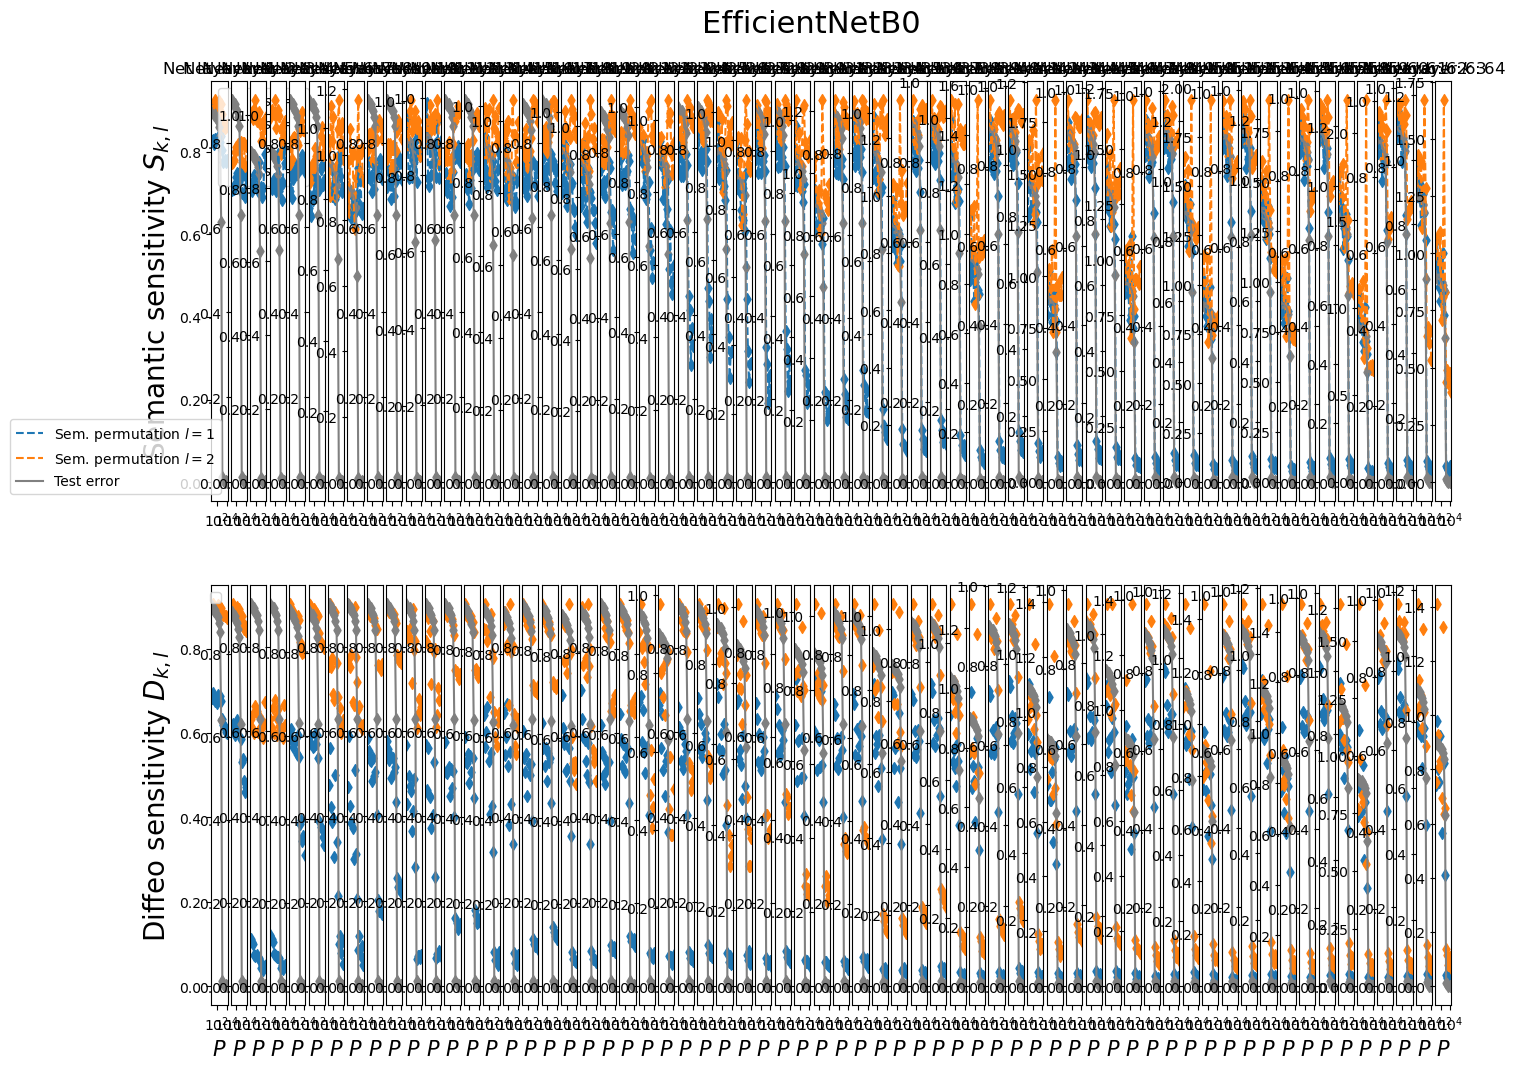

In [11]:
n=10

L=2
s=2

bs = 20
s0s = [2]#,2,4,6
net ='EfficientNetB0'

colors = ['C'+str(gg) for gg in range(0,L)]#cm.rainbow(np.linspace(0, 1, L))


m = n**(s-1)
for idx_s0 in range(len(s0s)):
    s0 = s0s[idx_s0]
    
    mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    num_layers = mat_all_pos.size(dim=1)
    print(num_layers)
    
    fig, axs = plt.subplots(2,num_layers, figsize = (16,12))
    fig.suptitle(net,fontsize =22,y=.94)
    
    #if s0>0 and L==2 and s==2:
    #    xx =xx
    #else:
    #    xx = xx*n
                            
    #xx = xx/(s0+1)**2 
    
    if idx_s0==0:
        mar = "d"
    elif idx_s0==1:
        mar = "o"
    elif idx_s0==2:
        mar = "x"
    elif idx_s0==3:
        mar = "s"
    for k in range(num_layers):
        
        for l in range(L):
            #print(mat_all[:,k,l])
            #print(s0s[idx_s0])
            #print(xx)
            #print(mat_all_sem[idx_s0,:len(xx),k,l])
            if idx_s0==0:
                axs[0,k].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],label =r"Sem. permutation $l=%d$" %(l+1),ls='--') 
                #axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
            else: 
                axs[0,k].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],ls='--') 
                if idx_s0==1:
                    axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
                else:
                    axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],ls='--') 
            if s0==0:
                axs[0,k].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            else:
                axs[0,k].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
                axs[1,k].scatter(xx, mat_all_pos[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            #axs[k].plot(xx, mat_norms[:,k,l], color = 'black',label ="norm l=%d" %(l+1)) 
        if k==0 and idx_s0==0:
            axs[0,k].plot(xx, mat_terr[:len(xx)], color = 'grey',label ="Test error" ) 
            axs[1,k].plot(xx, mat_terr[:len(xx)], color = 'grey')
        else:
            axs[0,k].plot(xx, mat_terr[:len(xx)], color = 'grey') 
            axs[1,k].plot(xx, mat_terr[:len(xx)], color = 'grey') 
        axs[0,k].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        axs[1,k].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        
        axs[0,k].set_xscale("log")
        axs[1,k].set_xscale("log")
        axs[1,k].set_xlabel("$P$",size = 15)
        #axs[k].set_ylim(0,1)
        if k==0: 
            axs[0,0].set_ylabel(r"Semantic sensitivity $S_{k,l}$",size = 20)
            axs[0,0].legend()
            axs[1,0].set_ylabel(r"Diffeo sensitivity $D_{k,l}$",size = 20)
            axs[1,0].legend()
        if k<num_layers:
            axs[0,k].set_title(r"Net layer $k: %d$" %(k+1))
        else:
            axs[0,L].set_title("Output")
            
s01 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s02 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s03 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s04 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
first_legend = axs[0,0].legend()
ax = axs[0,0].add_artist(first_legend)
axs[0,0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')  


#plt.savefig("figures/sens_cnn_L_%d_s_%d.png" %(L,s), bbox_inches='tight')
#plt.savefig("figures/sens_cnn_L_%d_s_%d.pdf" %(L,s), bbox_inches='tight')

64


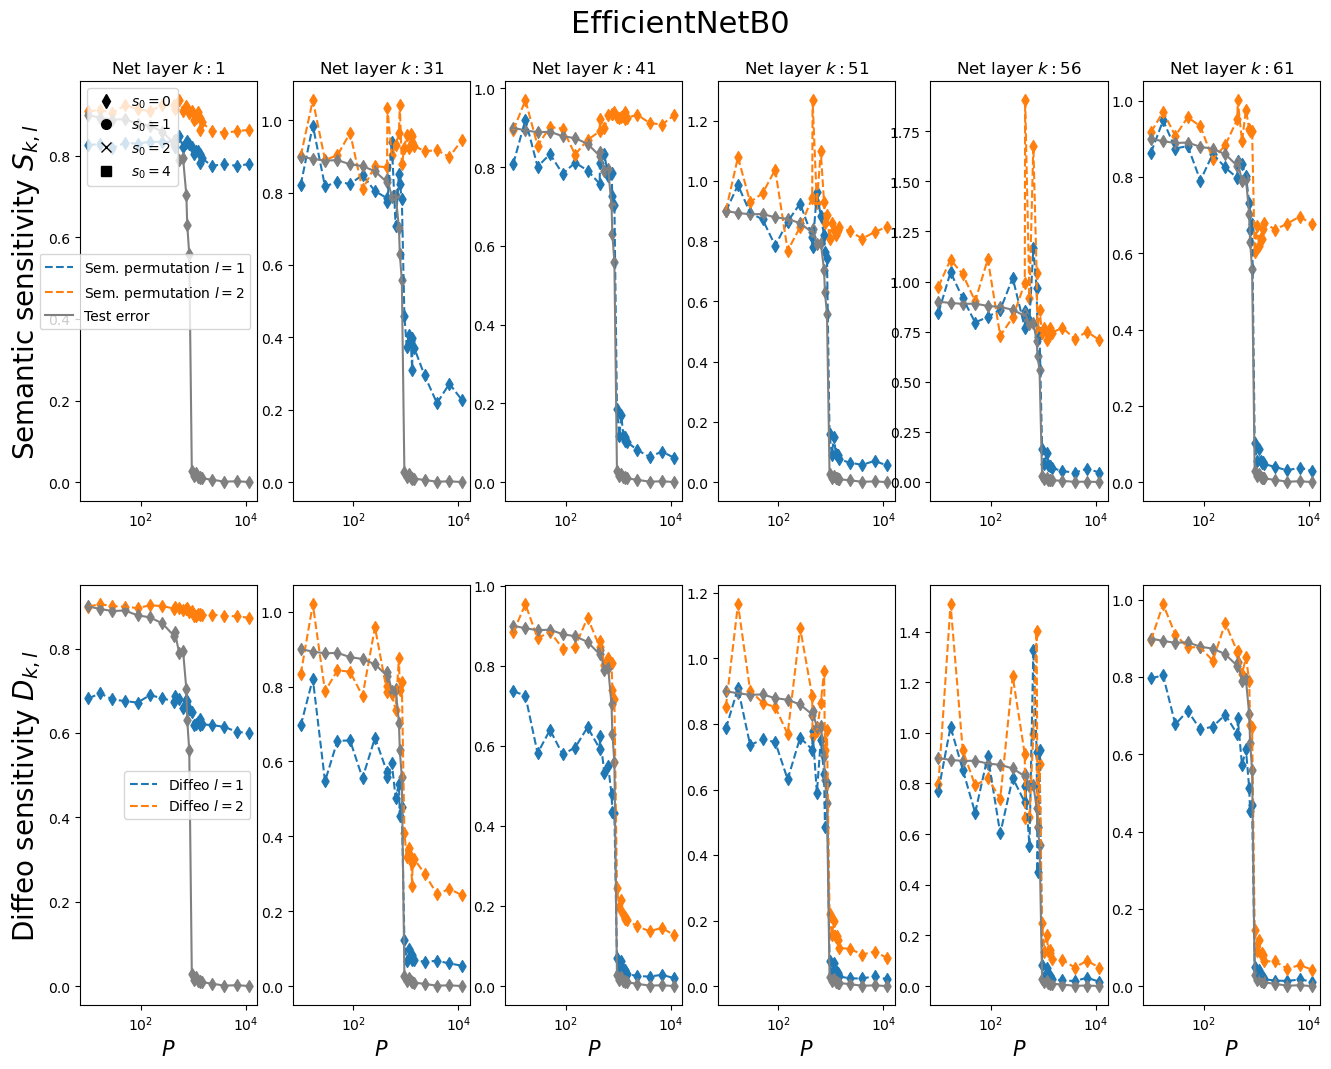

In [6]:
n=10

L=2
s=2

bs = 20
s0s = [2]#,2,4,6
net ='EfficientNetB0'

colors = ['C'+str(gg) for gg in range(0,L)]#cm.rainbow(np.linspace(0, 1, L))


m = n**(s-1)
for idx_s0 in range(len(s0s)):
    s0 = s0s[idx_s0]
    
    mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
    num_layers = mat_all_pos.size(dim=1)
    print(num_layers)

    layers = [0,30,40,50,55,60]

    
    fig, axs = plt.subplots(2,6, figsize = (16,12))
    fig.suptitle(net,fontsize =22,y=.94)
    
    #if s0>0 and L==2 and s==2:
    #    xx =xx
    #else:
    #    xx = xx*n
                            
    #xx = xx/(s0+1)**2 
    
    if idx_s0==0:
        mar = "d"
    elif idx_s0==1:
        mar = "o"
    elif idx_s0==2:
        mar = "x"
    elif idx_s0==3:
        mar = "s"
    for (lay,k) in enumerate(layers):
        
        for l in range(L):
            #print(mat_all[:,k,l])
            #print(s0s[idx_s0])
            #print(xx)
            #print(mat_all_sem[idx_s0,:len(xx),k,l])
            
            axs[0,lay].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],label =r"Sem. permutation $l=%d$" %(l+1),ls='--') 
                #axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
            
            axs[1,lay].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
            
            axs[0,lay].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
 
            axs[1,lay].scatter(xx, mat_all_pos[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            #axs[k].plot(xx, mat_norms[:,k,l], color = 'black',label ="norm l=%d" %(l+1)) 
        if k==0 and idx_s0==0:
            axs[0,lay].plot(xx, mat_terr[:len(xx)], color = 'grey',label ="Test error" ) 
            axs[1,lay].plot(xx, mat_terr[:len(xx)], color = 'grey')
        else:
            axs[0,lay].plot(xx, mat_terr[:len(xx)], color = 'grey') 
            axs[1,lay].plot(xx, mat_terr[:len(xx)], color = 'grey') 
        axs[0,lay].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        axs[1,lay].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        
        axs[0,lay].set_xscale("log")
        axs[1,lay].set_xscale("log")
        axs[1,lay].set_xlabel("$P$",size = 15)
        #axs[k].set_ylim(0,1)
        if k==0: 
            axs[0,0].set_ylabel(r"Semantic sensitivity $S_{k,l}$",size = 20)
            axs[0,0].legend()
            axs[1,0].set_ylabel(r"Diffeo sensitivity $D_{k,l}$",size = 20)
            axs[1,0].legend()
        if k<num_layers:
            axs[0,lay].set_title(r"Net layer $k: %d$" %(k+1))
        else:
            axs[0,L].set_title("Output")
            
s01 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s02 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s03 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s04 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
first_legend = axs[0,0].legend()
ax = axs[0,0].add_artist(first_legend)
axs[0,0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')  


#plt.savefig("figures/sens_cnn_L_%d_s_%d.png" %(L,s), bbox_inches='tight')
#plt.savefig("figures/sens_cnn_L_%d_s_%d.pdf" %(L,s), bbox_inches='tight')

8
13
17
33
64


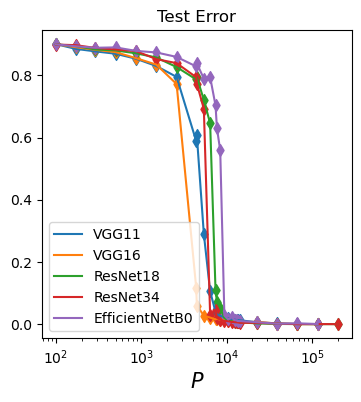

In [19]:
n=10

L=2
s=2

bs = 20
s0s = [2]#,2,4,6
nets = ['VGG11','VGG16','ResNet18','ResNet34','EfficientNetB0']

colors = ['C'+str(gg) for gg in range(0,L)]#cm.rainbow(np.linspace(0, 1, L))


m = n**(s-1)
fig, axs = plt.subplots(1,1, figsize = (4,4))
#fig.suptitle(net,fontsize =22,y=.94)

for (idxnet,net) in enumerate(nets):
    col = 'C'+str(idxnet)
    for idx_s0 in range(len(s0s)):
        s0 = s0s[idx_s0]
        
        mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
        mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
        mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
        xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
        num_layers = mat_all_pos.size(dim=1)
        print(num_layers)
        xx= xx*n
        if idx_s0==0:
            mar = "d"
        elif idx_s0==1:
            mar = "o"
        elif idx_s0==2:
            mar = "x"
        elif idx_s0==3:
            mar = "s"
        
        axs.plot(xx, mat_terr[:len(xx)], color = col,label =net ) 

        axs.scatter(xx, mat_terr[:len(xx)], color = col, marker = mar)
            
            
        axs.set_xscale("log")

        axs.set_xlabel("$P$",size = 15)
        
        axs.set_title("Test Error")

    axs.legend()



#plt.savefig("figures/sens_cnn_L_%d_s_%d.png" %(L,s), bbox_inches='tight')
#plt.savefig("figures/sens_cnn_L_%d_s_%d.pdf" %(L,s), bbox_inches='tight')

8
13
17
33
64


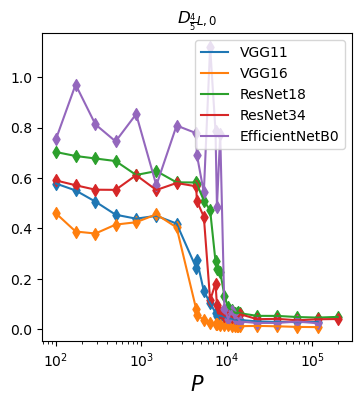

In [24]:
n=10

L=2
s=2

bs = 20
s0s = [2]#,2,4,6
nets = ['VGG11','VGG16','ResNet18','ResNet34','EfficientNetB0']

colors = ['C'+str(gg) for gg in range(0,L)]#cm.rainbow(np.linspace(0, 1, L))


m = n**(s-1)
fig, axs = plt.subplots(1,1, figsize = (4,4))
#fig.suptitle(net,fontsize =22,y=.94)

for (idxnet,net) in enumerate(nets):
    col = 'C'+str(idxnet)
    for idx_s0 in range(len(s0s)):
        s0 = s0s[idx_s0]
        
        mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
        mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
        mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
        xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
        num_layers = mat_all_pos.size(dim=1)
        print(num_layers)
        lay = int(num_layers*.8)
        xx= xx*n
        if idx_s0==0:
            mar = "d"
        elif idx_s0==1:
            mar = "o"
        elif idx_s0==2:
            mar = "x"
        elif idx_s0==3:
            mar = "s"
        
        axs.plot(xx, mat_all_pos[:len(xx),lay,0], color = col,label =net ) 

        axs.scatter(xx, mat_all_pos[:len(xx),lay,0], color = col, marker = mar)
            
            
        axs.set_xscale("log")

        axs.set_xlabel("$P$",size = 15)
        
        axs.set_title(r"$D_{\frac{4}{5}L,0}$")

    axs.legend()



#plt.savefig("figures/sens_cnn_L_%d_s_%d.png" %(L,s), bbox_inches='tight')
#plt.savefig("figures/sens_cnn_L_%d_s_%d.pdf" %(L,s), bbox_inches='tight')

8
13
17
33
64


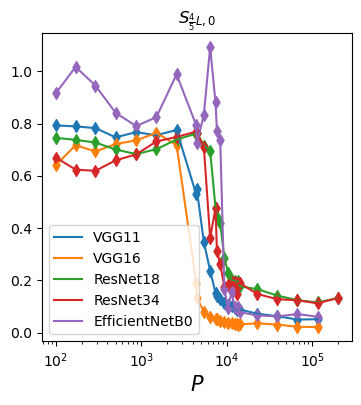

In [25]:
n=10

L=2
s=2

bs = 20
s0s = [2]#,2,4,6
nets = ['VGG11','VGG16','ResNet18','ResNet34','EfficientNetB0']

colors = ['C'+str(gg) for gg in range(0,L)]#cm.rainbow(np.linspace(0, 1, L))


m = n**(s-1)
fig, axs = plt.subplots(1,1, figsize = (4,4))
#fig.suptitle(net,fontsize =22,y=.94)

for (idxnet,net) in enumerate(nets):
    col = 'C'+str(idxnet)
    for idx_s0 in range(len(s0s)):
        s0 = s0s[idx_s0]
        
        mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
        mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
        mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
        xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
        num_layers = mat_all_pos.size(dim=1)
        print(num_layers)
        lay = int(num_layers*.8)
        xx= xx*n
        if idx_s0==0:
            mar = "d"
        elif idx_s0==1:
            mar = "o"
        elif idx_s0==2:
            mar = "x"
        elif idx_s0==3:
            mar = "s"
        
        axs.plot(xx, mat_all_sem[:len(xx),lay,0], color = col,label =net ) 

        axs.scatter(xx, mat_all_sem[:len(xx),lay,0], color = col, marker = mar)
            
            
        axs.set_xscale("log")

        axs.set_xlabel("$P$",size = 15)
        
        axs.set_title(r"$S_{\frac{4}{5}L,0}$")

    axs.legend()



#plt.savefig("figures/sens_cnn_L_%d_s_%d.png" %(L,s), bbox_inches='tight')
#plt.savefig("figures/sens_cnn_L_%d_s_%d.pdf" %(L,s), bbox_inches='tight')

tensor([   10,    17,    29,    50,    87,   150,   259,   440,   447,   540,
          640,   740,   769,   840,   940,  1040,  1140,  1240,  1324,  1340,
         1440,  2279,  3923,  6752, 11620])
tensor([   10,    17,    29,    50,    87,   150,   259,   440,   447,   540,
          640,   740,   769,   840,   940,  1040,  1140,  1240,  1324,  1340,
         1440,  2279,  3923,  6752, 11620])
8
tensor([   10,    17,    29,    50,    87,   150,   259,   440,   447,   540,
          640,   740,   769,   840,   940,  1040,  1140,  1240,  1324,  1340,
         1440,  2279,  3923,  6752, 11620])
tensor([   10,    17,    29,    50,    87,   150,   259,   440,   447,   540,
          640,   740,   769,   840,   940,  1040,  1140,  1240,  1324,  1340,
         1440,  2279,  3923,  6752, 11620])
13
tensor([   10,    17,    29,    50,    87,   150,   259,   440,   447,   540,
          640,   740,   769,   840,   940,  1040,  1140,  1240,  1324,  1340,
         1440,  2279,  3923,  6752, 116

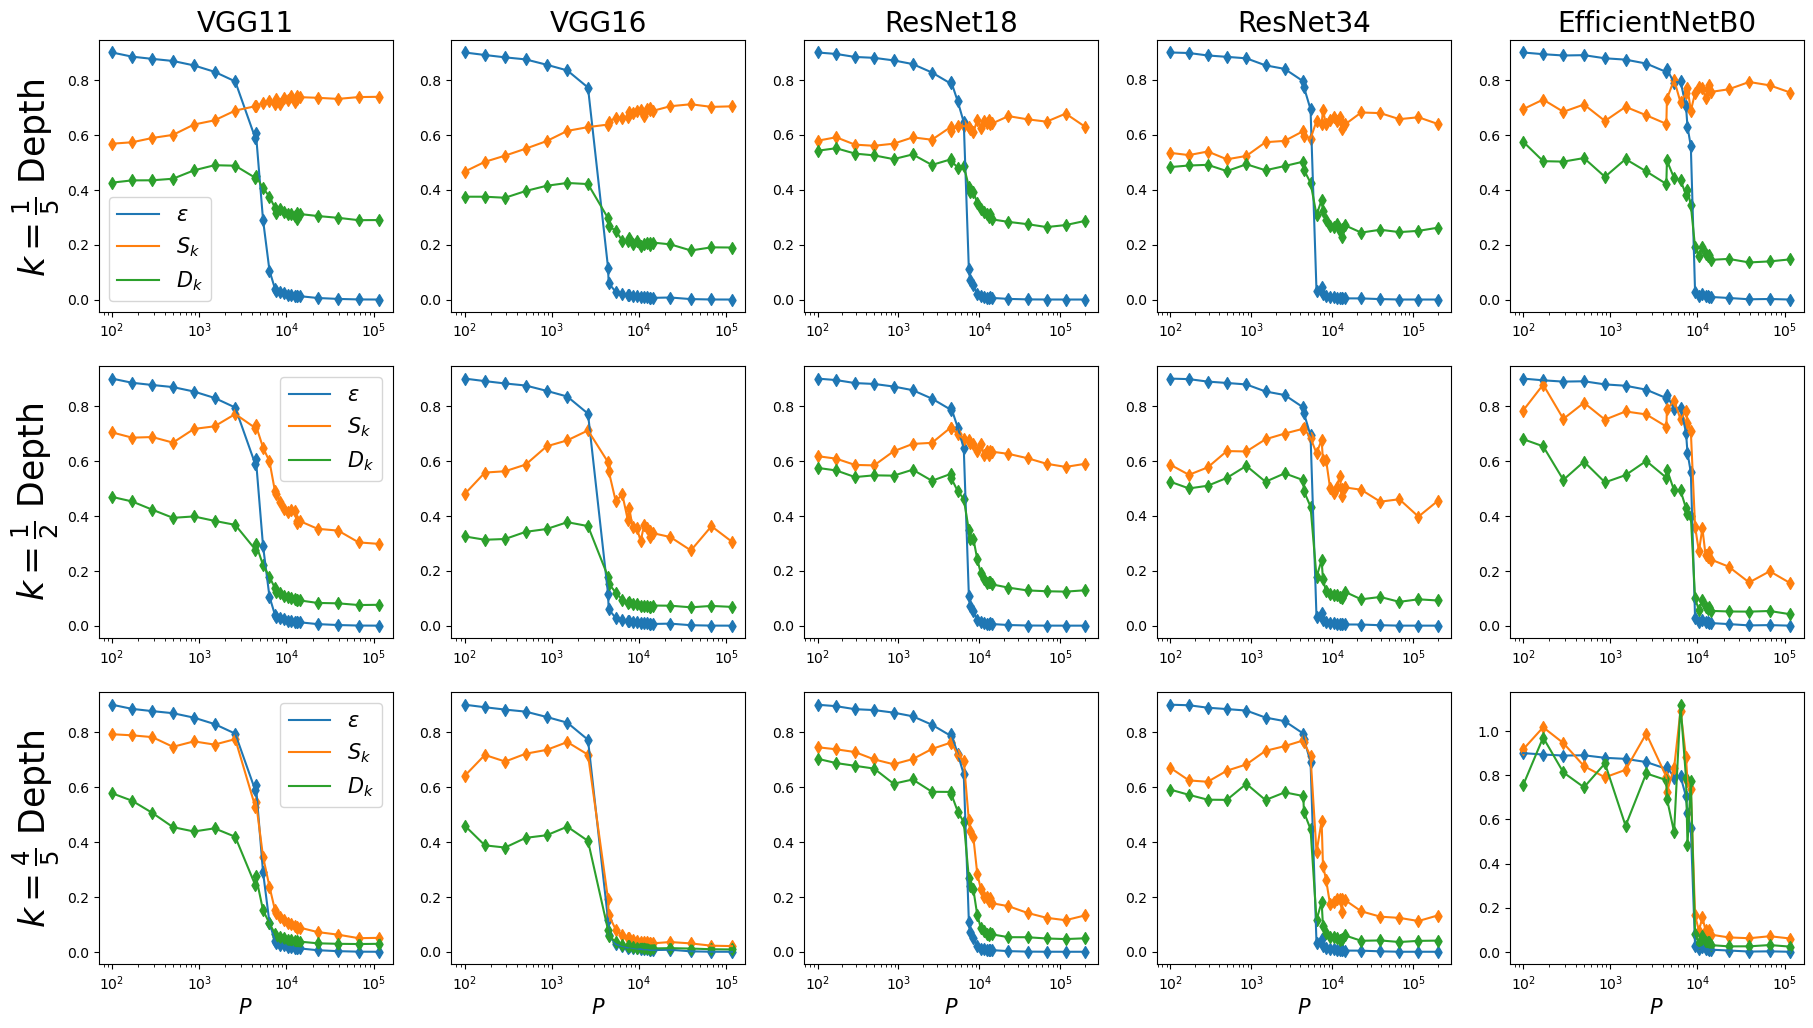

In [37]:
n=10

L=2
s=2

bs = 20
s0s = [2]#,2,4,6
nets = ['VGG11','VGG16','ResNet18','ResNet34','EfficientNetB0']

colors = ['C'+str(gg) for gg in range(0,L)]#cm.rainbow(np.linspace(0, 1, L))


m = n**(s-1)
fig, axs = plt.subplots(3,len(nets), figsize = (22,12))
#fig.suptitle(net,fontsize =22,y=.94)

for idx in range(3):
    if idx==0:
        fr = .2
        
    elif idx==1:
        fr = .5
    elif idx == 2:
        fr = .8

    for (idxnet,net) in enumerate(nets):
        
        for idx_s0 in range(len(s0s)):
            s0 = s0s[idx_s0]
            
            mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
            mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
            mat_all_gauss = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
            mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
            xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
            print(xx)
            #xx = torch.tensor([87,440,640,740,840,940,1040,1340,2279,3923])
            
            print(xx)
            num_layers = mat_all_pos.size(dim=1)
            print(num_layers)
            lay = int(num_layers*fr)
            xx= xx*n
            if idx_s0==0:
                mar = "d"
            elif idx_s0==1:
                mar = "o"
            elif idx_s0==2:
                mar = "x"
            elif idx_s0==3:
                mar = "s"
    
            axs[idx,idxnet].plot(xx, mat_terr[:len(xx)], color = 'C0',label =r"$\varepsilon$" ) 
            axs[idx,idxnet].scatter(xx, mat_terr[:len(xx)], color = 'C0', marker = mar)

            if idx==0:
                
                axs[idx,idxnet].plot(xx, mat_all_sem[:len(xx),lay,0], color = 'C1',label =r"$S_{k}$" ) 
                axs[idx,idxnet].plot(xx, mat_all_pos[:len(xx),lay,0], color = 'C2',label =r"$D_{k}$" )
                axs[idx,0].set_ylabel(r"$k= \frac{1}{5}$ Depth ",size = 25)
            elif idx==1:
                axs[idx,idxnet].plot(xx, mat_all_sem[:len(xx),lay,0], color = 'C1',label =r"$S_{k}$" ) 
                axs[idx,idxnet].plot(xx, mat_all_pos[:len(xx),lay,0], color = 'C2',label =r"$D_{k}$" ) 
                axs[idx,0].set_ylabel(r"$k= \frac{1}{2}$ Depth",size = 25)
            elif idx==2:
                axs[idx,idxnet].plot(xx, mat_all_sem[:len(xx),lay,0], color = 'C1',label =r"$S_{k}$" ) 
                axs[idx,idxnet].plot(xx, mat_all_pos[:len(xx),lay,0], color = 'C2',label =r"$D_{k}$" ) 
                axs[idx,0].set_ylabel(r"$k = \frac{4}{5}$ Depth",size = 25)
                
            axs[idx,idxnet].scatter(xx, mat_all_sem[:len(xx),lay,0], color = 'C1', marker = mar)
                
            #axs[idx,idxnet].plot(xx, mat_all_pos[:len(xx),lay,0], color = 'C2',label =r"$D_{L^*,1}$" ) 
            axs[idx,idxnet].scatter(xx, mat_all_pos[:len(xx),lay,0], color = 'C2', marker = mar)
                             
            axs[idx,idxnet].set_xscale("log")
    
            axs[2,idxnet].set_xlabel("$P$",size = 15)
            
            axs[0,idxnet].set_title(net,size = 20)

    axs[idx,0].legend(fontsize=15)



plt.savefig("figures/sens_newNets.png" , bbox_inches='tight')
plt.savefig("figures/sens_newNets.pdf" , bbox_inches='tight')

LCN
--check--
lcn
740 tensor(663)
------------
##value##
tensor(0.6733)
tensor(1.0295)
##############
okkk
CNN
--check--
cnn2
740 tensor(896.8000)
------------
##value##
tensor(0.3615)
tensor(1.4977)
##############
okkk
tensor([   10,    17,    29,    50,    87,   150,   259,   440,   447,   540,
          640,   740,   769,   840,   940,  1040,  1140,  1240,  1324,  1340,
         1440,  2279,  3923,  6752, 11620])
--check--
VGG11
740 tensor(740)
------------
##value##
tensor(0.1518)
tensor(0.4941)
##############
okkk
tensor([   10,    17,    29,    50,    87,   150,   259,   440,   447,   540,
          640,   740,   769,   840,   940,  1040,  1140,  1240,  1324,  1340,
         1440,  2279,  3923,  6752, 11620])
--check--
VGG16
740 tensor(740)
------------
##value##
tensor(0.0510)
tensor(0.4190)
##############
okkk
tensor([   10,    17,    29,    50,    87,   150,   259,   440,   447,   540,
          640,   740,   769,   840,   940,  1040,  1140,  1240,  1324,  1340,
         1440,

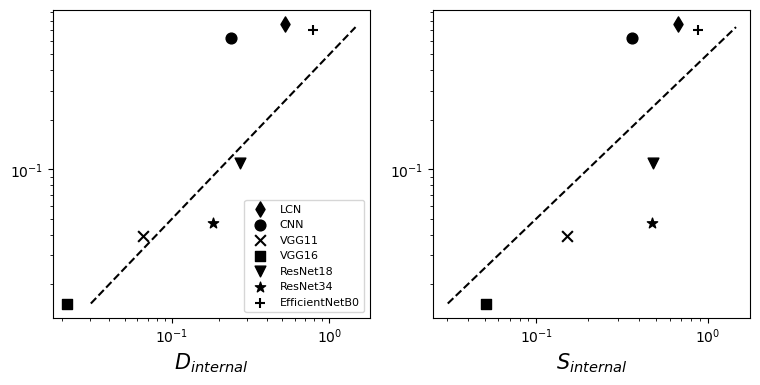

In [2]:
ns = np.array([10])   #[3,4,6,8,10,12])
s0s = [2] #[0,1,2,4,6]
    
Ls= [2] #[2,3]
sss = [2] #[2,3]
bs = 20

nets = ['lcn','cnn2','VGG11','VGG16','ResNet18','ResNet34','EfficientNetB0']
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

def find_closest_position(lst, target):
    closest_index = min(range(len(lst)), key=lambda i: abs(lst[i] - target))
    return closest_index 

flag_s = np.zeros(len(ns))
flag_s0 = np.zeros(len(ns))
flag_L = np.zeros(len(ns))
pchecks = [440, 540, 640,    840,   1040,   1240,  1340]
pchecks_fine = [570,585,600,615]
pchecks_fine2 = [590,595]
pchecks = [740]

for pcheck in pchecks:


    vs = []
    fig, axs = plt.subplots(1,2, figsize = (9,4))
    #fig.suptitle(r'$P$: '+str(pcheck*ns[0]))
    #fig.suptitle(r"SRHM, $L=%d$, $n_c=m=%d$, $s=%d$, $s_0=%d$, $P=7400$" %(Ls[0],ns[0],sss[0],s0s[0]),size = 15)
    for (idxnet,net) in enumerate(nets):
    
    
        if idxnet==0:
            mar = "d"
        elif idxnet==1:
            mar = "o"
        elif idxnet==2:
            mar = "x"
        elif idxnet==3:
            mar = "s"
        elif idxnet==4:
            mar = "v"
        elif idxnet==5:
            mar = "*"
        elif idxnet==6:
            mar = "+"
        for (idx_L,L) in enumerate(Ls):   
            
            for (idx_s,s) in enumerate(sss):
                
                if s==2:
                    idxx = 0
                elif s==3:
                    idxx = 1
               
                
                
                
                    
                #print('L: '+str(L))
                expo = 2
                if L==2:
                    alpha = 1
                    size = 60
                elif L==3:
                    alpha = 1
                    size =150
                
                
                for (idx_s0,s0) in enumerate(s0s):
                    #print('s0: '+str(s0))
    
                    
                    for (idxn,n) in enumerate(ns):
                        m = n**(s-1)
                        
                        try:
                            if net!='cnn2' and net!='lcn' :
                                if pcheck in pchecks_fine:
                                    
                                    mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP.pt'%(L,n,m,s0,s,bs,net))
                                    mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP.pt'%(L,n,m,s0,s,bs,net))
                                    mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP.pt'%(L,n,m,s0,s,bs,net))
                                    xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP.pt'%(L,n,m,s0,s,bs,net))
                                elif pcheck in pchecks_fine2:
                                    
                                    mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP2.pt'%(L,n,m,s0,s,bs,net))
                                    mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP2.pt'%(L,n,m,s0,s,bs,net))
                                    mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP2.pt'%(L,n,m,s0,s,bs,net))
                                    xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP2.pt'%(L,n,m,s0,s,bs,net))
                                else:
                                    mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                    mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                    mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                    xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                    mat_all_gauss = torch.load('mats/mat_gauss_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                    #print(mat_all_gauss)
                                    #xx_gauss =  torch.tensor([87,440,640,740,840,940,1040,1340,2279,3923])
                                    print(xx)
                            elif net=='lcn':
                                
                                mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                mat_all_gauss = torch.load('mats/mat_gauss_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                print('LCN')
                            elif net=='cnn2':
                                
                                mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                                mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                                mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                                mat_all_gauss = torch.load('mats/mat_gauss_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                                print('CNN')
                            if net =='cnn2':
                                if L==2 and s0>0 and s==2:
                                    xx = (xx/n)
                            
                            idx_xx = find_closest_position(xx, pcheck)    
                            #idx_xx_gauss = find_closest_position(xx_gauss, pcheck) 
                            #idx_xx = np.where(xx == pcheck)
                            #print(mat_terr[idx_xx].tolist())
                            
                            num_layers = mat_all_pos.size(dim=1)
                            
                            if net=='cnn2' or net=='lcn':
                                lay = 2
                            else:
                                lay = int(num_layers*.8)
                            #lay = num_layers-1
                            
                            col = 'black'#colors[idxn]
                            fact = 1#(s)**(L*.5)
                            expo =2                        
                            #if terr>0:
                            #print(mat_terr[idx_xx].tolist(),mat_all_sem[idx_xx].tolist())

                            print('--check--')
                            print(net)
                            
                            print(pcheck, xx[idx_xx])
                            
                            
                            if 'Effi' in net:
                                print(mat_all_sem.size())
                                print(mat_terr[idx_xx].tolist(),mat_all_sem[idx_xx,lay,0])
                            print('------------')
                            if net=='cnn2':
                                labs = 'CNN'
                            elif net=='lcn':
                                labs = 'LCN'
                            else:
                                labs = net
                            sem = mat_all_sem[idx_xx,lay,0]#/mat_all_gauss[idx_xx,lay,0]
                            pos = mat_all_pos[idx_xx,lay,0]#/mat_all_gauss[idx_xx,lay,0]
                            print("##value##")
                            print(mat_all_sem[idx_xx,lay,0])
                            print(mat_all_gauss[idx_xx,lay,0])
                            
                            print('##############')
                           
                            axs[1].scatter(sem.tolist(),mat_terr[idx_xx].tolist(),marker = mar,color = col,s=size, label =labs)
                            axs[0].scatter(pos.tolist(),mat_terr[idx_xx].tolist(),marker = mar,color = col,s=size, label = labs)
                            print('okkk')
                            vs+=[mat_terr[idx_xx]]
                            #print(vs)
                        except:
                            pass
    print(vs)                     
    min0 = min(vs)
    max0 = max(vs)
    # print(min0,max0)
    ps = np.arange(min0,max0,(max0-min0)/20)
    #C = max(pstars.flatten().tolist())/max0
    axs[0].plot(2*ps**(1),ps,color='black',ls='--')
    axs[1].plot(2*ps**(1),ps,color='black',ls='--')
    
    #axs[1].plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')
    
    axs[0].set_xscale('log')
    axs[1].set_xscale('log')
    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    
    #axs[0].set_ylabel(r'$\varepsilon$',size = 15)
    #axs[1].set_xlabel(r'$\varepsilon$',size = 15)
    axs[1].set_xlabel(r'$S_{internal}$',size = 15)
    
    axs[0].set_xlabel(r'$D_{internal}$',size = 15)
    axs[0].legend(loc = 'lower right',fontsize = 8) 
    if pcheck ==740:
        plt.savefig("figures/phaseDiagram_terr_S_new_nets_P_%d.png"%(pcheck) , bbox_inches='tight')
        plt.savefig("figures/phaseDiagram_terr_S_new_nets_P_%d.pdf"%(pcheck) , bbox_inches='tight')
        print('ok')
    
    
    #axs[0].legend()#handles=n0,loc = 'upper left') 
    
    #axs[0].add_artist(legend1)
        
        #

LCN
--check--
lcn
740 tensor(663)
------------
##value##
tensor(0.6733)
tensor(1.0295)
##############
okkk
CNN
--check--
cnn2
740 tensor(896.8000)
------------
##value##
tensor(0.3615)
tensor(1.4977)
##############
okkk
tensor([   10,    17,    29,    50,    87,   150,   259,   440,   447,   540,
          640,   740,   769,   840,   940,  1040,  1140,  1240,  1324,  1340,
         1440,  2279,  3923,  6752, 11620])
--check--
VGG11
740 tensor(740)
------------
##value##
tensor(0.1391)
tensor(0.5052)
##############
okkk
tensor([   10,    17,    29,    50,    87,   150,   259,   440,   447,   540,
          640,   740,   769,   840,   940,  1040,  1140,  1240,  1324,  1340,
         1440,  2279,  3923,  6752, 11620])
--check--
VGG16
740 tensor(740)
------------
##value##
tensor(0.0383)
tensor(0.5025)
##############
okkk
tensor([   10,    17,    29,    50,    87,   150,   259,   440,   447,   540,
          640,   740,   769,   840,   940,  1040,  1140,  1240,  1324,  1340,
         1440,

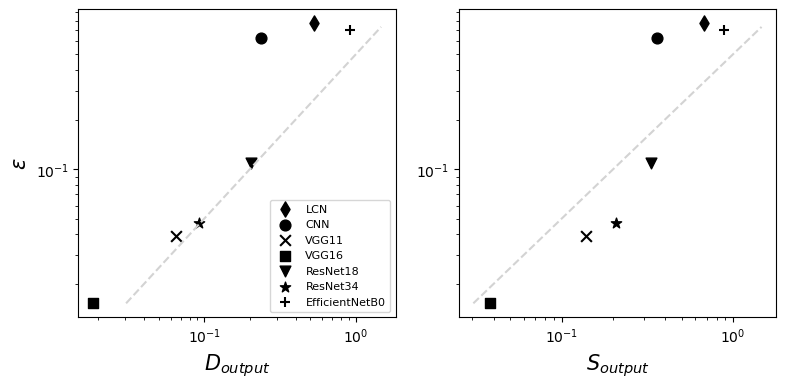

In [6]:
ns = np.array([10])   #[3,4,6,8,10,12])
s0s = [2] #[0,1,2,4,6]
    
Ls= [2] #[2,3]
sss = [2] #[2,3]
bs = 20

nets = ['lcn','cnn2','VGG11','VGG16','ResNet18','ResNet34','EfficientNetB0']
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

def find_closest_position(lst, target):
    closest_index = min(range(len(lst)), key=lambda i: abs(lst[i] - target))
    return closest_index 

flag_s = np.zeros(len(ns))
flag_s0 = np.zeros(len(ns))
flag_L = np.zeros(len(ns))
pchecks = [440, 540, 640,    840,   1040,   1240,  1340]
pchecks_fine = [570,585,600,615]
pchecks_fine2 = [590,595]
pchecks = [740]

for pcheck in pchecks:


    vs = []
    fig, axs = plt.subplots(1,2, figsize = (9,4))
    #fig.suptitle(r'$P$: '+str(pcheck*ns[0]))
    #fig.suptitle(r"SRHM, $L=%d$, $n_c=m=%d$, $s=%d$, $s_0=%d$, $P=7400$" %(Ls[0],ns[0],sss[0],s0s[0]),size = 15)
    for (idxnet,net) in enumerate(nets):
    
    
        if idxnet==0:
            mar = "d"
        elif idxnet==1:
            mar = "o"
        elif idxnet==2:
            mar = "x"
        elif idxnet==3:
            mar = "s"
        elif idxnet==4:
            mar = "v"
        elif idxnet==5:
            mar = "*"
        elif idxnet==6:
            mar = "+"
        for (idx_L,L) in enumerate(Ls):   
            
            for (idx_s,s) in enumerate(sss):
                
                if s==2:
                    idxx = 0
                elif s==3:
                    idxx = 1
               
                
                
                
                    
                #print('L: '+str(L))
                expo = 2
                if L==2:
                    alpha = 1
                    size = 60
                elif L==3:
                    alpha = 1
                    size =150
                
                
                for (idx_s0,s0) in enumerate(s0s):
                    #print('s0: '+str(s0))
    
                    
                    for (idxn,n) in enumerate(ns):
                        m = n**(s-1)
                        
                        try:
                            if net!='cnn2' and net!='lcn' :
                                if pcheck in pchecks_fine:
                                    
                                    mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP.pt'%(L,n,m,s0,s,bs,net))
                                    mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP.pt'%(L,n,m,s0,s,bs,net))
                                    mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP.pt'%(L,n,m,s0,s,bs,net))
                                    xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP.pt'%(L,n,m,s0,s,bs,net))
                                elif pcheck in pchecks_fine2:
                                    
                                    mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP2.pt'%(L,n,m,s0,s,bs,net))
                                    mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP2.pt'%(L,n,m,s0,s,bs,net))
                                    mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP2.pt'%(L,n,m,s0,s,bs,net))
                                    xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP2.pt'%(L,n,m,s0,s,bs,net))
                                else:
                                    mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                    mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                    mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                    xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                    mat_all_gauss = torch.load('mats/mat_gauss_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                    #print(mat_all_gauss)
                                    #xx_gauss =  torch.tensor([87,440,640,740,840,940,1040,1340,2279,3923])
                                    print(xx)
                            elif net=='lcn':
                                
                                mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                mat_all_gauss = torch.load('mats/mat_gauss_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                print('LCN')
                            elif net=='cnn2':
                                
                                mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                                mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                                mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                                mat_all_gauss = torch.load('mats/mat_gauss_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                                print('CNN')
                            if net =='cnn2':
                                if L==2 and s0>0 and s==2:
                                    xx = (xx/n)
                            
                            idx_xx = find_closest_position(xx, pcheck)    
                            #idx_xx_gauss = find_closest_position(xx_gauss, pcheck) 
                            #idx_xx = np.where(xx == pcheck)
                            #print(mat_terr[idx_xx].tolist())
                            
                            num_layers = mat_all_pos.size(dim=1)
                            
                            lay = int(num_layers*.8)
                            lay = num_layers-1
                            
                            col = 'black'#colors[idxn]
                            fact = 1#(s)**(L*.5)
                            expo =2                        
                            #if terr>0:
                            #print(mat_terr[idx_xx].tolist(),mat_all_sem[idx_xx].tolist())

                            print('--check--')
                            print(net)
                            
                            print(pcheck, xx[idx_xx])
                            
                            
                            if 'Effi' in net:
                                print(mat_all_sem.size())
                                print(mat_terr[idx_xx].tolist(),mat_all_sem[idx_xx,lay,0])
                            print('------------')
                            if net=='cnn2':
                                labs = 'CNN'
                            elif net=='lcn':
                                labs = 'LCN'
                            else:
                                labs = net
                            sem = mat_all_sem[idx_xx,lay,0]#/mat_all_gauss[idx_xx,lay,0]
                            pos = mat_all_pos[idx_xx,lay,0]#/mat_all_gauss[idx_xx,lay,0]
                            print("##value##")
                            print(mat_all_sem[idx_xx,lay,0])
                            print(mat_all_gauss[idx_xx,lay,0])
                            
                            print('##############')
                           
                            axs[1].scatter(sem.tolist(),mat_terr[idx_xx].tolist(),marker = mar,color = col,s=size, label =labs)
                            axs[0].scatter(pos.tolist(),mat_terr[idx_xx].tolist(),marker = mar,color = col,s=size, label = labs)
                            print('okkk')
                            vs+=[mat_terr[idx_xx]]
                            #print(vs)
                        except:
                            pass
    print(vs)                     
    min0 = min(vs)
    max0 = max(vs)
    # print(min0,max0)
    ps = np.arange(min0,max0,(max0-min0)/20)
    #C = max(pstars.flatten().tolist())/max0
    axs[0].plot(2*ps**(1),ps,color='lightgrey',ls='--')
    axs[1].plot(2*ps**(1),ps,color='lightgrey',ls='--')
    
    #axs[1].plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')
    
    axs[0].set_xscale('log')
    axs[1].set_xscale('log')
    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    
    axs[0].set_ylabel(r'$\varepsilon$',size = 15)
    #axs[1].set_xlabel(r'$\varepsilon$',size = 15)
    axs[1].set_xlabel(r'$S_{output}$',size = 15)
    
    axs[0].set_xlabel(r'$D_{output}$',size = 15)
    axs[0].legend(loc = 'lower right',fontsize = 8) 
    if pcheck ==740:
        plt.savefig("figures/phaseDiagram_terr_S_new_nets_P_%d_output.png"%(pcheck) , bbox_inches='tight')
        plt.savefig("figures/phaseDiagram_terr_S_new_nets_P_%d_output.pdf"%(pcheck) , bbox_inches='tight')
        print('ok')
    
    
    #axs[0].legend()#handles=n0,loc = 'upper left') 
    
    #axs[0].add_artist(legend1)
        
        #

[100, 200, 300, 500, 700, 800, 900, 1000, 2000, 3000, 5000, 7000, 8000, 9000, 10000, 20000, 30000, 50000, 70000, 80000, 90000]
[100, 200, 300, 440, 500, 540, 570, 585, 600, 615, 640, 700, 800, 840, 900, 1000, 1040, 1240, 1340, 2000, 3000, 5000, 7000, 8000, 9000, 10000, 20000, 30000, 50000, 70000, 80000, 90000]
[0.1, 0.1333521432163324, 0.1778279410038923, 0.23713737056616552, 0.31622776601683794, 0.4216965034285822, 0.5623413251903491, 0.7498942093324559, 1.0]
tensor(87)
tensor(440)
tensor(640)
tensor(840)
tensor(940)
tensor(1040)
tensor(1340)
tensor(2279)
tensor(3923)
tensor(87)
tensor(440)
tensor(640)
tensor(840)
tensor(940)
tensor(1040)
tensor(1340)
tensor(2279)
tensor(3923)
tensor(87)
tensor(440)
tensor(640)
tensor(840)
tensor(940)
tensor(1040)
tensor(1340)
tensor(2279)
tensor(3923)
tensor(100)
tensor(454)
tensor(663)
tensor(968)
tensor(1414)
tensor(3014)
tensor(4401)


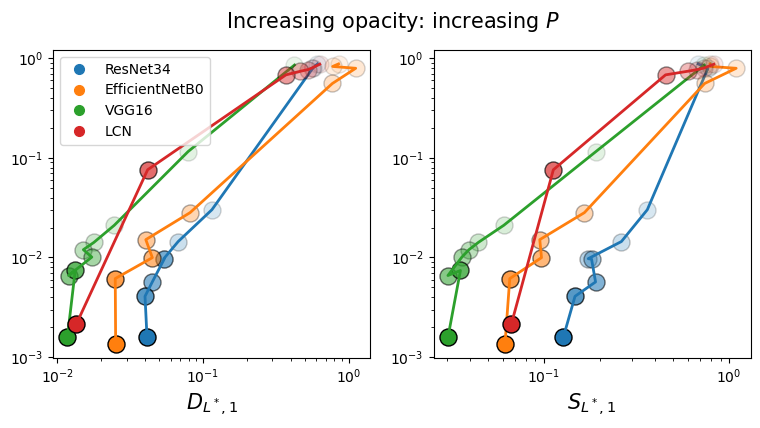

In [5]:
def find_closest_position(lst, target):
    closest_index = min(range(len(lst)), key=lambda i: abs(lst[i] - target))
    return closest_index
    
ns = np.array([10])   #[3,4,6,8,10,12])
s0s = [2] #[0,1,2,4,6]
    
Ls= [2] #[2,3]
sss = [2] #[2,3]

bs = 20
nets = ['cnn','lcn','VGG11','VGG16','ResNet18','ResNet34','EfficientNetB0'] #'cnn','lcn',
nets = ['lcn','VGG16','ResNet34','EfficientNetB0']
nets = ['ResNet34','EfficientNetB0','VGG16','lcn']
#colors = cm.rainbow(np.linspace(0, 1, len(nets)))

flag_s = np.zeros(len(ns))
flag_s0 = np.zeros(len(ns))
flag_L = np.zeros(len(ns))

fig, axs = plt.subplots(1,2, figsize = (9,4))
fig.suptitle(r" Increasing opacity: increasing $P$" ,size = 15)

pchecks = []
for i in range(2,5):
    pchecks += [10**i]
    pchecks += [2*10**i]
    pchecks += [3*10**i]
    pchecks += [5*10**i]
    pchecks += [7*10**i]
    pchecks += [8*10**i]
    pchecks += [9*10**i]
print(pchecks)

pchecks+= [440, 540, 570,585,600,615,640,    840,   1040,   1240,  1340]
pchecks.sort()
print(pchecks)
tmp = []
for i in pchecks:
    if i<6000: 
        tmp+=[i]
pchecks = tmp
pchecks=[100, 440,  640, 840,940,1040,  1340, 3000, 5000]


pchecks_fine = [570,585,600,615]
pchecks_fine2 = [590,595]


alphas_lcn = [i for i in 10**np.linspace(-1,0,7)]
alphas = [i for i in 10**np.linspace(-1,0,9)]
print(alphas)
colors = []
for (idxnet,net) in enumerate(nets):

    mar = 'o'
    
    #col = colors[idxnet]
    if 'ResNet' in net:
        col = 'C0'
    elif 'Efficient' in net:
        col = 'C1'   
    elif 'VGG' in net:
        col = 'C2'  
    elif 'lcn' in net:
        col = 'C3' 
    colors += [col]
    for (idx_L,L) in enumerate(Ls):
    
        for (idx_s,s) in enumerate(sss):
            
           
            vs = []
            
                
            #print('L: '+str(L))
            expo = 2
            if L==2:
    
                size = 150
            elif L==3:
    
                size =300
            
            
            for (idx_s0,s0) in enumerate(s0s):
                #print('s0: '+str(s0))
    

                for (idxn,n) in enumerate(ns):
                    m = n**(s-1)
                    ps_e = []
                    ps_s = []
                    ps_d = []
                    idxc = 0
                    for (idxp,pcheck) in enumerate(pchecks):
                         
                        #try:
                            
                        if net!='cnn' and net!='lcn' :
                            if pcheck in pchecks_fine:
                                
                                mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP.pt'%(L,n,m,s0,s,bs,net))
                                mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP.pt'%(L,n,m,s0,s,bs,net))
                                mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP.pt'%(L,n,m,s0,s,bs,net))
                                xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP.pt'%(L,n,m,s0,s,bs,net))
                                
                            elif pcheck in pchecks_fine2:
                                
                                mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP2.pt'%(L,n,m,s0,s,bs,net))
                                mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP2.pt'%(L,n,m,s0,s,bs,net))
                                mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP2.pt'%(L,n,m,s0,s,bs,net))
                                xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP2.pt'%(L,n,m,s0,s,bs,net))
                            else:
                                mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                
                        elif net=='lcn':
                            mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                            mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                            mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                            xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                        elif net=='cnn':
                            
                            mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                            mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                            mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                            xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                       
                        if net =='cnn':
                            #print(xx)
                            #if L==2 and s0>0 and s==2:
                            xx = xx/n
                        
                        idx_xx = find_closest_position(xx, pcheck)    
                        #idx_xx = np.where(xx == pcheck)
                        #print(mat_terr[idx_xx].tolist())
                         
                        num_layers = mat_all_pos.size(dim=1)
                        
                        lay = int(num_layers*.8)
                        if net =='cnn' or net=='lcn':
                            lay = num_layers -1
                        else:
                            lay = int(num_layers*.8)
                        #col = colors[idxn]
                        fact = 1#(s)**(L*.5)
                        expo =2

                        terr = mat_terr[idx_xx].tolist()
                        sens_s = mat_all_sem[idx_xx,lay,0].tolist()
                        sens_d = mat_all_pos[idx_xx,lay,0].tolist()
                        
                        if terr not in ps_e and terr>=0.001:
                            
                            if net!='lcn':
                                axs[1].scatter(sens_s,terr,marker = mar,facecolors=col, edgecolors='black',s=size, alpha = alphas[idxc], label = r'$P=%d$'%pcheck, zorder=2)
                                axs[0].scatter(sens_d,terr,marker = mar,facecolors=col, edgecolors='black',s=size, alpha = alphas[idxc], label = r'$P=%d$'%pcheck, zorder=2)
                            else:
                                axs[1].scatter(sens_s,terr,marker = mar,facecolors=col, edgecolors='black',s=size, alpha = alphas_lcn[idxc], label = r'$P=%d$'%pcheck, zorder=2)
                                axs[0].scatter(sens_d,terr,marker = mar,facecolors=col, edgecolors='black',s=size, alpha = alphas_lcn[idxc], label = r'$P=%d$'%pcheck, zorder=2)
                           
                            vs+=[terr]
                            
                            ps_e+=[terr]
                            ps_s+=[sens_s]
                            ps_d+=[sens_d]

                            idxc+=1 
                            print(xx[idx_xx])
                            

                    axs[1].plot(ps_s,ps_e, color = col,ls = '-',linewidth = 2)
                    axs[0].plot(ps_d,ps_e,color = col,ls = '-',linewidth = 2)
         
min0 = 0#min(vs)
max0 = 1# max(vs)
# print(min0,max0)
ps = np.arange(min0,max0,(max0-min0)/20)
#C = max(pstars.flatten().tolist())/max0
#axs[0].plot(ps,ps,label=r'$y=x$',color='black',ls='--')
#axs[1].plot(ps,ps,label=r'$y=x$',color='black',ls='--')

#axs[1].plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')

axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_yscale('log')

#axs[1].set_ylabel(r'$\varepsilon$',size = 15)
#axs[0].set_ylabel(r'$\varepsilon$',size = 15)
axs[1].set_xlabel(r'$S_{L^*,1}$',size = 15)#$S_{\frac{4}{5}L,1}$ or $S_{21}$
axs[0].set_xlabel(r'$D_{L^*,1}$',size = 15)
#L3 = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
#              markersize=7, label=r'$L=3$')

s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')

s2 = mlines.Line2D([], [], color='black', marker='o',  linestyle='None',
              markersize=3, label=r'$L=2$')
s3 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=9, label=r'$L=3$')

#s00,s01,s02,s03,s04,

#legend1 = axs[0].legend(handles=[s2,s3],loc = 'lower right') 

n0 = []
for i in range(len(nets)):
    if nets[i]=='lcn':
        n0 += [mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None',
              markersize=7, label='LCN')]
    else:
        n0 += [mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None',
                      markersize=7, label='%s'%nets[i])]
axs[0].legend(handles=n0,loc = 'upper left') 

#axs[0].add_artist(legend1)
    
plt.savefig("figures/phaseDiagram_terr_S_cnn2_increasingP_allFixed_NewNets.png" , bbox_inches='tight')
plt.savefig("figures/phaseDiagram_terr_S_cnn2_increasingP_allFixed_NewNets.pdf" , bbox_inches='tight')

[100, 200, 300, 500, 700, 800, 900, 1000, 2000, 3000, 5000, 7000, 8000, 9000, 10000, 20000, 30000, 50000, 70000, 80000, 90000]
[100, 200, 300, 440, 500, 540, 570, 585, 600, 615, 640, 700, 800, 840, 900, 1000, 1040, 1240, 1340, 2000, 3000, 5000, 7000, 8000, 9000, 10000, 20000, 30000, 50000, 70000, 80000, 90000]
[0.1, 0.1333521432163324, 0.1778279410038923, 0.23713737056616552, 0.31622776601683794, 0.4216965034285822, 0.5623413251903491, 0.7498942093324559, 1.0]
tensor(87)
tensor(440)
tensor(640)
tensor(840)
tensor(940)
tensor(1040)
tensor(1340)
tensor(2279)
tensor(3923)
tensor(87)
tensor(440)
tensor(640)
tensor(840)
tensor(940)
tensor(1040)
tensor(1340)
tensor(2279)
tensor(3923)
tensor(87)
tensor(440)
tensor(640)
tensor(840)
tensor(940)
tensor(1040)
tensor(1340)
tensor(2279)
tensor(3923)
tensor(100)
tensor(454)
tensor(663)
tensor(968)
tensor(1414)
tensor(3014)
tensor(4401)


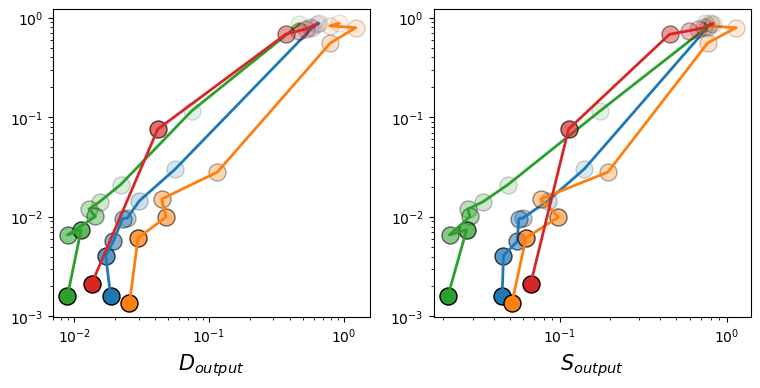

In [9]:
def find_closest_position(lst, target):
    closest_index = min(range(len(lst)), key=lambda i: abs(lst[i] - target))
    return closest_index
    
ns = np.array([10])   #[3,4,6,8,10,12])
s0s = [2] #[0,1,2,4,6]
    
Ls= [2] #[2,3]
sss = [2] #[2,3]

bs = 20
nets = ['cnn','lcn','VGG11','VGG16','ResNet18','ResNet34','EfficientNetB0'] #'cnn','lcn',
nets = ['lcn','VGG16','ResNet34','EfficientNetB0']
nets = ['ResNet34','EfficientNetB0','VGG16','lcn']
#colors = cm.rainbow(np.linspace(0, 1, len(nets)))

flag_s = np.zeros(len(ns))
flag_s0 = np.zeros(len(ns))
flag_L = np.zeros(len(ns))

fig, axs = plt.subplots(1,2, figsize = (9,4))
#fig.suptitle(r" Increasing opacity: increasing $P$" ,size = 15)

pchecks = []
for i in range(2,5):
    pchecks += [10**i]
    pchecks += [2*10**i]
    pchecks += [3*10**i]
    pchecks += [5*10**i]
    pchecks += [7*10**i]
    pchecks += [8*10**i]
    pchecks += [9*10**i]
print(pchecks)

pchecks+= [440, 540, 570,585,600,615,640,    840,   1040,   1240,  1340]
pchecks.sort()
print(pchecks)
tmp = []
for i in pchecks:
    if i<6000: 
        tmp+=[i]
pchecks = tmp
pchecks=[100, 440,  640, 840,940,1040,  1340, 3000, 5000]


pchecks_fine = [570,585,600,615]
pchecks_fine2 = [590,595]


alphas_lcn = [i for i in 10**np.linspace(-1,0,7)]
alphas = [i for i in 10**np.linspace(-1,0,9)]
print(alphas)
colors = []
for (idxnet,net) in enumerate(nets):

    mar = 'o'
    
    #col = colors[idxnet]
    if 'ResNet' in net:
        col = 'C0'
    elif 'Efficient' in net:
        col = 'C1'   
    elif 'VGG' in net:
        col = 'C2'  
    elif 'lcn' in net:
        col = 'C3' 
    colors += [col]
    for (idx_L,L) in enumerate(Ls):
    
        for (idx_s,s) in enumerate(sss):
            
           
            vs = []
            
                
            #print('L: '+str(L))
            expo = 2
            if L==2:
    
                size = 150
            elif L==3:
    
                size =300
            
            
            for (idx_s0,s0) in enumerate(s0s):
                #print('s0: '+str(s0))
    

                for (idxn,n) in enumerate(ns):
                    m = n**(s-1)
                    ps_e = []
                    ps_s = []
                    ps_d = []
                    idxc = 0
                    for (idxp,pcheck) in enumerate(pchecks):
                         
                        #try:
                            
                        if net!='cnn' and net!='lcn' :
                            if pcheck in pchecks_fine:
                                
                                mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP.pt'%(L,n,m,s0,s,bs,net))
                                mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP.pt'%(L,n,m,s0,s,bs,net))
                                mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP.pt'%(L,n,m,s0,s,bs,net))
                                xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP.pt'%(L,n,m,s0,s,bs,net))
                                
                            elif pcheck in pchecks_fine2:
                                
                                mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP2.pt'%(L,n,m,s0,s,bs,net))
                                mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP2.pt'%(L,n,m,s0,s,bs,net))
                                mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP2.pt'%(L,n,m,s0,s,bs,net))
                                xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s_FineTunedP2.pt'%(L,n,m,s0,s,bs,net))
                            else:
                                mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                                
                        elif net=='lcn':
                            mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                            mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                            mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                            xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                        elif net=='cnn':
                            
                            mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                            mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                            mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                            xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                       
                        if net =='cnn':
                            #print(xx)
                            #if L==2 and s0>0 and s==2:
                            xx = xx/n
                        
                        idx_xx = find_closest_position(xx, pcheck)    
                        #idx_xx = np.where(xx == pcheck)
                        #print(mat_terr[idx_xx].tolist())
                         
                        num_layers = mat_all_pos.size(dim=1)
                        
                        lay = num_layers-1
                        #col = colors[idxn]
                        fact = 1#(s)**(L*.5)
                        expo =2

                        terr = mat_terr[idx_xx].tolist()
                        sens_s = mat_all_sem[idx_xx,lay,0].tolist()
                        sens_d = mat_all_pos[idx_xx,lay,0].tolist()
                        
                        if terr not in ps_e and terr>=0.001:
                            
                            if net!='lcn':
                                axs[1].scatter(sens_s,terr,marker = mar,facecolors=col, edgecolors='black',s=size, alpha = alphas[idxc], label = r'$P=%d$'%pcheck, zorder=2)
                                axs[0].scatter(sens_d,terr,marker = mar,facecolors=col, edgecolors='black',s=size, alpha = alphas[idxc], label = r'$P=%d$'%pcheck, zorder=2)
                            else:
                                axs[1].scatter(sens_s,terr,marker = mar,facecolors=col, edgecolors='black',s=size, alpha = alphas_lcn[idxc], label = r'$P=%d$'%pcheck, zorder=2)
                                axs[0].scatter(sens_d,terr,marker = mar,facecolors=col, edgecolors='black',s=size, alpha = alphas_lcn[idxc], label = r'$P=%d$'%pcheck, zorder=2)
                           
                            vs+=[terr]
                            
                            ps_e+=[terr]
                            ps_s+=[sens_s]
                            ps_d+=[sens_d]

                            idxc+=1 
                            print(xx[idx_xx])
                            

                    axs[1].plot(ps_s,ps_e, color = col,ls = '-',linewidth = 2)
                    axs[0].plot(ps_d,ps_e,color = col,ls = '-',linewidth = 2)
         
min0 = 0#min(vs)
max0 = 1# max(vs)
# print(min0,max0)
ps = np.arange(min0,max0,(max0-min0)/20)
#C = max(pstars.flatten().tolist())/max0
#axs[0].plot(ps,ps,label=r'$y=x$',color='black',ls='--')
#axs[1].plot(ps,ps,label=r'$y=x$',color='black',ls='--')

#axs[1].plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')

axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_yscale('log')

#axs[1].set_ylabel(r'$\varepsilon$',size = 15)
#axs[0].set_ylabel(r'$\varepsilon$',size = 15)
axs[1].set_xlabel(r'$S_{output}$',size = 15)#$S_{\frac{4}{5}L,1}$ or $S_{21}$
axs[0].set_xlabel(r'$D_{output}$',size = 15)
#L3 = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
#              markersize=7, label=r'$L=3$')

s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')

s2 = mlines.Line2D([], [], color='black', marker='o',  linestyle='None',
              markersize=3, label=r'$L=2$')
s3 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=9, label=r'$L=3$')

#s00,s01,s02,s03,s04,

#legend1 = axs[0].legend(handles=[s2,s3],loc = 'lower right') 

n0 = []
for i in range(len(nets)):
    if nets[i]=='lcn':
        n0 += [mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None',
              markersize=7, label='LCN')]
    else:
        n0 += [mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None',
                      markersize=7, label='%s'%nets[i])]
#axs[0].legend(handles=n0,loc = 'upper left') 

#axs[0].add_artist(legend1)
    
plt.savefig("figures/phaseDiagram_terr_S_cnn2_increasingP_allFixed_NewNets_out.png" , bbox_inches='tight')
plt.savefig("figures/phaseDiagram_terr_S_cnn2_increasingP_allFixed_NewNets_out.pdf" , bbox_inches='tight')